In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [16]:

# Step 1: Load the Data
df = pd.read_csv('weatherHistory.csv')



In [17]:
# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())


         Date  Unnamed: 1  Unnamed: 2                 Formatted Date  \
0  01-04-2006         NaN         NaN  2006-04-01 00:00:00.000 +0200   
1  01-04-2006         NaN         NaN  2006-04-01 01:00:00.000 +0200   
2  01-04-2006         NaN         NaN  2006-04-01 02:00:00.000 +0200   
3  01-04-2006         NaN         NaN  2006-04-01 03:00:00.000 +0200   
4  01-04-2006         NaN         NaN  2006-04-01 04:00:00.000 +0200   

         Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0  Partly Cloudy        rain         9.472222                  7.388889   
1  Partly Cloudy        rain         9.355556                  7.227778   
2  Mostly Cloudy        rain         9.377778                  9.377778   
3  Partly Cloudy        rain         8.288889                  5.944444   
4  Mostly Cloudy        rain         8.755556                  6.977778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197           

C:\Users\Apkr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


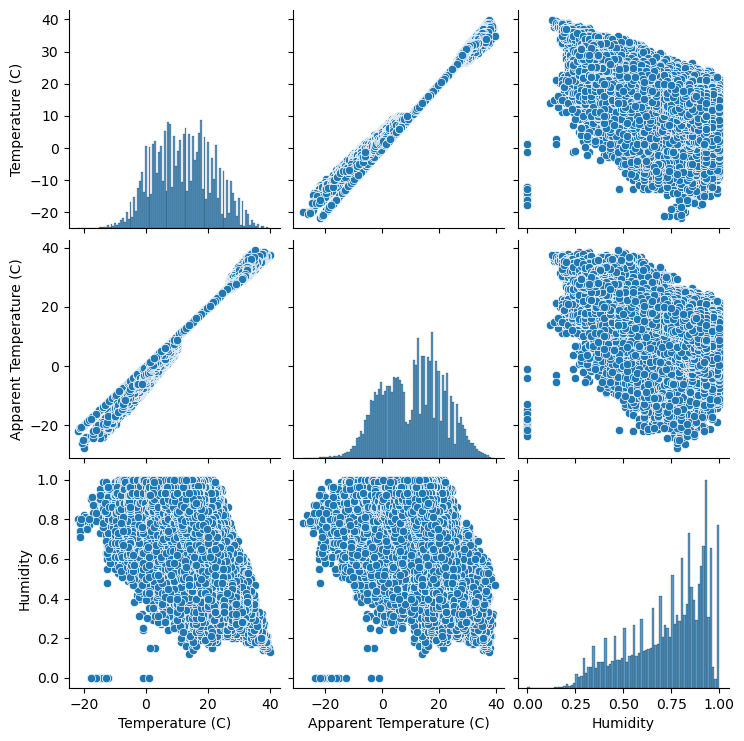

In [18]:

# Step 3: Data Visualization
sns.pairplot(df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']])
plt.show()


In [25]:
#Calculate average MaxTemp by month
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month'] = df['Date'].dt.month
monthly_avg_max_temp = df.groupby('Month')['Temperature (C)'].mean()


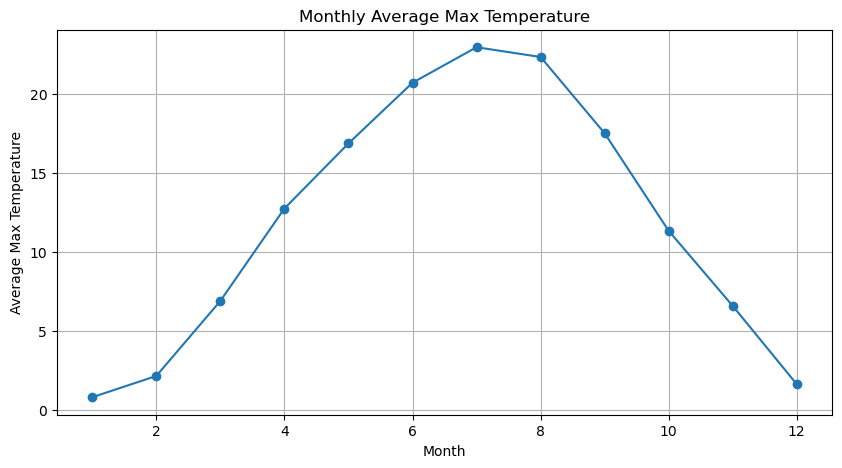

In [26]:

# Step 6: Data Visualization (Part 2)
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()



In [29]:

# Prepare the data for prediction
X = df[['Temperature (C)', 'Apparent Temperature (C)']]
y = df['Humidity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:

# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')


Mean Squared Error for Rainfall Prediction: 0.021459470673501523


In [32]:

# Step 8: Conclusions and Insights (analyze each term)
#  Identify the highest and lowest rainfall months
highest_rainfall_month = monthly_avg_max_temp.idxmax()
lowest_rainfall_month = monthly_avg_max_temp.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')


Highest rainfall month: 7, Lowest rainfall month: 1
